# 🚪 **Door Model Training**

Welcome to this notebook!  
Here, we’ll walk through the journey of training a **YOLO (You Only Look Once)** object detection model — not just for the sake of AI fun, but for a meaningful goal:

### 🎯 **Goal**:  
To help **blind and visually impaired people** identify **door position** using just their **phones or a simple web app**.  

We're building a fast, smart, and efficient model that can run on mobile devices and help people *see* through AI. 🤖👁️💵

---

## 🧪 What’s Inside This Notebook?

1. **📁 Dataset Preparation**  
   - Grab the dataset from Roboflow. (dataset link below)

2. **🛠️ Model Setup**  
   - Choose your YOLO flavor (v5, v8 — pick your fighter).  
   - Set up the training parameters to keep things lean and mean.

3. **🏋️ Model Training**  
   - Let YOLO learn what money looks like.  
   - Watch training metrics like loss and accuracy to track progress.

4. **📦 Downloading Results**  
   - Package everything nicely (from `runs/detect/train`).  
   - Zip it up and take it with you!

5. **📊 Model Evaluation**  
   - Test the model on unseen money.  
   - Visualize results — because seeing is believing!

---

⚠️ **Before You Begin**:  
Make sure all the dependencies are installed, and your dataset is formatted correctly. A smooth setup makes for a smooth training ride. 🛤️💻

---

Let’s get started and teach YOLO to recognize the cash that matters — and in the process, make technology a little more helpful for everyone. 💙


# 1. Install All the Required Dependencies

In [ ]:
!pip install ultralytics tensorflow opencv-python roboflow

# 2. Load & Format the Dataset

### 📁 Dataset Used

This project uses the [**Pintu (Door) Dataset**](https://universe.roboflow.com/objek-dalam-3-ayunda/pintu-model/) from [Roboflow Universe](https://universe.roboflow.com/).

**License**: [Creative Commons Attribution 4.0 (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/)




In [ ]:
from roboflow import Roboflow

# rf = Roboflow(api_key="YOUR_API_KEY")
rf = Roboflow(api_key="YOUR_API_KEY")
project = rf.workspace("objek-dalam-3-ayunda").project("pintu-model")
dataset = project.version("1").download(
    "yolov8", # or coco, voc, etc.
)

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to pintu-model-1 in yolov8:: 100%|██████████| 2012/2012 [00:00<00:00, 3757.66it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
dataset.location

'/content/pintu-model-1'

# 3. Model Tranining

We will choose `yolov8n.pt` as our base model, since we will use it in phones and websites with light weight devices.

In [ ]:
from ultralytics import YOLO

# Load YOLOv8 model (use yolov8n.pt, yolov8s.pt, etc.)
model = YOLO("yolov8n.pt")  # or yolov8s.pt / yolov8m.pt etc.

# Train on your filtered dataset
model.train(data=dataset.location + "/data.yaml", epochs=50, imgsz=640)

# 4. Downloading the Results of Training

In [ ]:
!zip -r trained_model.zip runs/detect/train

  adding: runs/detect/train/ (stored 0%)
  adding: runs/detect/train/args.yaml (deflated 53%)
  adding: runs/detect/train/train_batch2042.jpg (deflated 13%)
  adding: runs/detect/train/results.png (deflated 7%)
  adding: runs/detect/train/val_batch2_pred.jpg (deflated 11%)
  adding: runs/detect/train/confusion_matrix.png (deflated 37%)
  adding: runs/detect/train/results.csv (deflated 60%)
  adding: runs/detect/train/train_batch0.jpg (deflated 5%)
  adding: runs/detect/train/labels_correlogram.jpg (deflated 40%)
  adding: runs/detect/train/val_batch0_labels.jpg (deflated 10%)
  adding: runs/detect/train/train_batch2040.jpg (deflated 11%)
  adding: runs/detect/train/train_batch2.jpg (deflated 6%)
  adding: runs/detect/train/BoxP_curve.png (deflated 21%)
  adding: runs/detect/train/BoxR_curve.png (deflated 18%)
  adding: runs/detect/train/confusion_matrix_normalized.png (deflated 36%)
  adding: runs/detect/train/train_batch2041.jpg (deflated 12%)
  adding: runs/detect/train/val_batch1_la

In [ ]:
from google.colab import files
files.download("trained_model.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 5. Training & Evaluating YOLOv8

After training your YOLOv8 model, you might be curious about all the amazing info stored in the `runs/detect/train` folder. And trust me, it’s packed with useful insights!

### What’s in the `runs/detect/train` Folder?
This folder contains all the important results from your model's training journey, including:
- **Model Weights**: You'll find the `best.pt` (your champion model) and `last.pt` (the model from the last epoch).
- **Training Logs**: This shows key metrics like loss, precision, recall, and mAP (mean Average Precision), updated after each epoch.
- **Plots**: Visual graphs displaying the training process — watch as your model gets smarter with each pass.
- **Evaluation Metrics**: You’ll get detailed metrics like **loss**, **mAP-50**, and more, based on the **validation dataset**.

### Does YOLOv8 Test on the Test Dataset?
Here’s the scoop: while YOLOv8 does evaluate your model’s performance on the **validation dataset** during training (every few epochs), it **does not automatically test** on the **test dataset**. This means that the mAP values you see in your logs are from the validation set, not from the final, unseen test data.

The test dataset is typically reserved for your **final evaluation** after training. This is where you get to see how your model performs on truly unseen data. Want to evaluate it on the test dataset? You’ll need to manually run an evaluation:

```bash python
results = model.val(data="path_to_model", task="test")


In [ ]:
from ultralytics import YOLO

# Load the pretrained or fine-tuned YOLOv8 model
path = "/content/runs/detect/train/weights/best.pt"
model = YOLO(path)  # Use your best model here

# Evaluate the model on the test dataset
# Make sure data.yaml points to the correct locations for your test set
results = model.val(data=dataset.location+"/data.yaml", task="test")

# Show results after testing
print("Results on Test Dataset:")
print(results)

### 📊 YOLOv8 Evaluation Results on Test Dataset

The model was evaluated using the test set defined in `data.yaml`, and the following results were obtained:

| **Metric**             | **Value**   |
|------------------------|-------------|
| **Precision (B)**      | 0.9813      |
| **Recall (B)**         | 0.9598      |
| **mAP@0.5 (B)**        | 0.9927      |
| **mAP@0.5:0.95 (B)**   | 0.8781      |
| **Fitness Score**      | 0.8896      |

---

### 🏷 Class Information
- **Class Evaluated**: `pintu` (Indonesian for "door")
- **Objects in Test Set**: 224
- **Test Images**: 186

---

### ⚡ Inference Speed (per image)
| **Step**        | **Time (ms)** |
|-----------------|---------------|
| Preprocessing   | 2.48          |
| Inference       | 5.34          |
| Postprocessing  | 3.34          |

---

- **Model Used**: `/content/runs/detect/train/weights/best.pt`
- **Results Directory**: `runs/test/val`

✅ These results indicate **high precision and recall**, showing strong detection performance on the `"door"` class.


## Now let's test on some Local Images of Jordanian money, and see its predictions


image 1/1 /content/img3.jpg: 448x640 1 pintu, 10.3ms
Speed: 1.8ms preprocess, 10.3ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


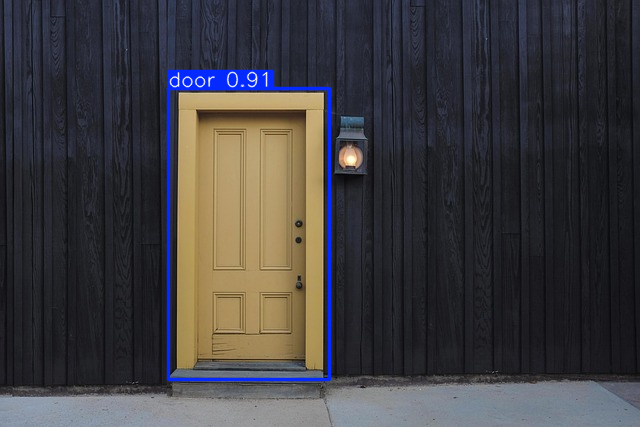

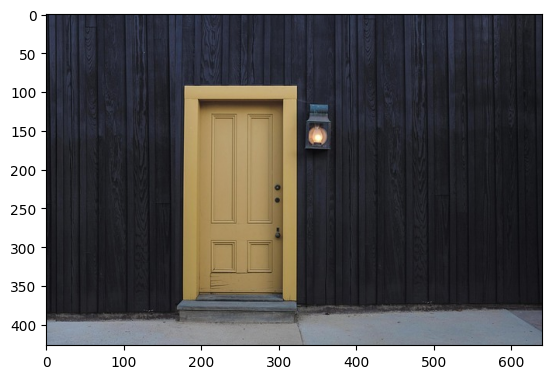

In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt


# Load the pretrained or fine-tuned YOLOv8 model
path = "best.pt"
model = YOLO(path)  # Use your best model here

# Custom label mapping (edit as needed)
label_map = {
    'pintu': 'door'
}

# Path to your local image(s)
image_paths = ["img3.jpg"]  # List of image paths

# Run inference on each image
for image_path in image_paths:
    # Predict objects in the image
    results = model.predict(image_path)[0]

        # Create a new label dictionary from results.names
    updated_names = {
        k: label_map.get(v, v) for k, v in results.names.items()
    }

    # Replace results.names with updated labels
    results.names = updated_names

    # Visualize the results
    results.show()  # Display the detected objects on the image

    # You can also save the image with detections
    results.save()  # This saves the output image with bounding boxes and labels

    # If you want to display the result manually (optional)
    img = cv2.imread(image_path)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()